# SAT & ACT Analysis

### Contents:
- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Library Imports](#Library-Imports)
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Problem Statement
In this project, the main focus was to analyze data from a set of data that encompassed the 2017 and 2018 statistics from the SAT and ACT college entrance standardized exams. The focus of this analysis is on the potential relationships between participation rates of each standardized exam, as well as other metrics which may be actionable. 

## Executive Summary

This report is centered around the test taking data available regarding college-bound students in the USA from the years of 2017 to 2018. The population in these datasets is comprised of graduating High School Seniors who took the exams as part of the college application process. The ACT minimum possible score is a 1, the maximum possible score is a 36 and the mean possible is a 21. The SAT minimum score is a 200 for each of the 2 sections for a total minimum of 400, and the maximum score for each of the 2 sections is 800 for a total maximum of 1600. 

It is clear from looking through this data that state contracts play a large role in the success or failure of high participation rates in a state. Although there is little that can be done in states with existing contracts, there is significant opportunity to grow in non-contract bound states. Next steps would include reaching out to those states with no contract in place for the ACT, which include: Alaska, Arizona, Iowa, Kansas, New Mexico, Oregon, South Dakota and West Virginia.

### Library Imports

In [1]:
#Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 2017 Data Import and Cleaning

#### Read In SAT & ACT  Data

In [2]:
sat_2017 = pd.read_csv("./data/sat_2017.csv")
act_2017 = pd.read_csv("./data/act_2017.csv")

#### Display First 10 Rows of Data


In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### Description of Data
 

Overall, it appears that the % participation is much higher skewed for the ACT than the SAT, at least in 2017 data. It also appears that most states either prefer one of the tests to require participation, as there are 100% participation rates in some states for SAT or ACT, and then correspondingly extremely low participation for the other test.
Additionally it appears that the higher the % participation, the lower the average score (for both tests). This makes sense as the population of the test takers would bring the average down as more mediocre students are forced to take the exams, whereas students who are choosing to take the non-required exam would likely only put in the time, money and effort if they thought they were going to get a high enough score for it to be worth it. This represents a combination of two distinctly separate groups of students: those who are self-selecting due to their investment and belief they will succeed, and those who are forced to take the test as part of state requirements. 


Both of the datasets appear to not have any missing data in them from looking at null_values through the .info() method, but there are some questionable aspects of the data individually. 

Answer: Both of the datasets appear to not have any missing data in them from looking at null_values through the .info() method, but there are some questionable aspects of the data individually. 

#### Issues with the Observations

In Maryland for SAT 2017 data, it appears the Math score is a typo with a score of 52, whereas the total is 1060, and the Evidence Based Reading and Writing is 536. This leads me to believe that the correct value for Math is 524, as that would combine with the other score to accurately reflect the total sum value of 1060.

In Wyoming for ACT 2017 data, the Composite score is '20.2x' and should be '20.2'

In Maryland for ACT 2017, the Science score is '2.3' and should be '23.8'

#### Fixing the identified errors

In [5]:
#Maryland SAT Math score fix from 52 to 524
sat_2017['Math'][20] = 524
act_2017['Science'][20] = 23.8

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Display the data types of each feature. 

In [6]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [7]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

We can identify that "Participation" is not the data type we would expect, as it is an object but should be a float numeric value

#### Fixing Incorrect Data Types

In [8]:
#defining a function to convert participation type to float
def participation_conv(column):
    part_conv = column.map(lambda column_cell: float(column_cell.replace('%','')))
    return(part_conv)

In [9]:
sat_2017['Participation'] = participation_conv(sat_2017['Participation'])
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [10]:
act_2017['Participation'] = participation_conv(act_2017['Participation'])
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

#### Additional fixes required of individual values preventing other columns from being the appropriate type.

In [11]:
#replace 20.2x in Composite column with 20.2
act_2017['Composite'][51] = '20.2';


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
#converting to float
act_2017['Composite'] = act_2017['Composite'].astype(float)

In [13]:
#standardizing the spelling of DC
act_2017['State'][9]= 'District of Columbia'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Verify that the columns are now typed appropriately.

In [14]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [15]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### Verify the data types are correct.

In [16]:
act_2017.dtypes


State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [17]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### Renaming Columns
Next, we change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). 

In [18]:
sat_2017.columns = map(str.lower,sat_2017.columns)
sat_2017.columns = sat_2017.columns.str.replace(' ','_')
sat_2017.head()

,state,participation,evidence-based_reading_and_writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [19]:
sat_2017.columns = ['sat_2017'+str(col) for col in sat_2017.columns]
sat_2017.columns

Index(['sat_2017state', 'sat_2017participation',
       'sat_2017evidence-based_reading_and_writing', 'sat_2017math',
       'sat_2017total'],
      dtype='object')

In [20]:
act_2017.columns = map(str.lower,act_2017.columns)
act_2017.columns

Index(['state', 'participation', 'english', 'math', 'reading', 'science',
       'composite'],
      dtype='object')

In [21]:
act_2017.columns = ['act_2017'+str(col) for col in act_2017.columns]

In [22]:
act_2017.columns

Index(['act_2017state', 'act_2017participation', 'act_2017english',
       'act_2017math', 'act_2017reading', 'act_2017science',
       'act_2017composite'],
      dtype='object')

#### Creating a data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
'state'|object|2017/18  ACT/SAT|US State from which data was collected|
'act_2017participation'|float64|2017 ACT|Percentage of graduating hs seniors taking the ACT in 2017, Scored 1-100
'act_2017english'|float64|2017 ACT|Avg test scores by state in English for ACT in 2017, Scored 1-36
'act_2017math'|float64|2017 ACT|Avg test scores by state in Math for ACT in 2017, Scored 1-36
'act_2017reading'|float64|2017 ACT|Avg test scores by state in Reading for ACT in 2017, Scored 1-36
'act_2017science'|float64|2017 ACT|Avg test scores by state in Science for ACT in 2017, Scored 1-36
'act_2017composite'|float64|2017 ACT|Avg Composite score by state for ACT in 2017, Scored 1-36
'sat_2017participation'|float64|2017 SAT|Percentage of graduating HS Seniors taking the SAT in 2017, Scored 1-100
'sat_2017evidence-based_reading_and_writing'|int64|2017 SAT|Avg test scores by state in EBRW for SAT in 2017, Scored 400-800
'sat_2017math'|int64|2017 SAT|Avg test scores by state in Math for SAT in 2017, Scored 400-800
'sat_2017total'|int64|2017 SAT|Avg total test scores by state for SAT in 2017, Scored 800-1600
'act_2018participation'|float64|2018 ACT|Percentage of graduating HS Seniors taking the ACT in 2018, Scored 1-100
'act_2018composite'|float64|2018 ACT|Avg composite score for the ACT in 2018, Scored 1-36
'sat_2018participation'|float64|2018 SAT|Percentage of graduating HS Seniors taking the SAT in 2018, Scored 1-100
'sat_2018evidence-based_reading_and_writing'|int64|2018 SAT|Avg test scores by state in EBRW for SAT in 2018, Scored 400-800
'sat_2018math',|int64|2018 SAT|Avg test scores by state in Math for SAT in 2018, Scored 400-800
'sat_2018total'|int64|2018 SAT|Avg total test scores by state for SAT in 2018, Scored 800-1600

In [23]:
#create a list of all the columns and print it
col_list=[]
col_list = list(sat_2017.columns)
print(col_list)

['sat_2017state', 'sat_2017participation', 'sat_2017evidence-based_reading_and_writing', 'sat_2017math', 'sat_2017total']


#### Dropping unnecessary rows

One of our dataframes contains an extra row, so we need to identify and remove this from the dataframe.

In [24]:
#dropping National row in act_2017
act_2017.drop(axis=0,     # axis: 0 = row, 1 = column
              labels = 0, # this is the first row, labels is for single thing. columns is for multiple
              inplace= True) # commit changes

#### Merging Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key

In [25]:
#Code:
combined_2017 = pd.merge(act_2017, 
      sat_2017,
      left_on = 'act_2017state',
      right_on = 'sat_2017state')

combined_2017.head()

,act_2017state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017state,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,Alabama,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,Alaska,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,Arizona,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,Arkansas,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,California,53.0,531,524,1055


#### Save your cleaned, merged dataframe

In [26]:
combined_2017.to_csv('./data/combined_2017.csv')

## 2018 Data Import and Cleaning

In [27]:
#import the csv files and save as dataframes
sat_2018 = pd.read_csv("./data/2018 Testing Data - SAT 2018.csv")
act_2018 = pd.read_csv("./data/2018 Testing Data - ACT 2018.csv")


In [28]:
#fix errors in names
sat_2018['State'][10]= 'Mississippi'
sat_2018['State'][37]= 'Oklahoma'
act_2018['State'][13]= 'District of Columbia'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [29]:
#Cleaning sat_2018, with function to remove % and change object to float pt.1
sat_2018['Participation'] = participation_conv(sat_2018['Participation'])

In [30]:
#Cleaning sat_2018, making all column headers lower case and no spaces pt.2
sat_2018.columns = map(str.lower,sat_2018.columns)

In [31]:
#Cleaning sat_2018, making all column headers lower case and no spacespt.3
sat_2018.columns = ['sat_2018'+str(col) for col in sat_2018.columns]
sat_2018.columns = sat_2018.columns.str.replace(' ','_')

In [32]:
#cleaning act_2018, with function to remove % and change object to float pt.1 
act_2018['Participation'] = participation_conv(act_2018['Participation'])

In [33]:
#cleaning act_2018, with function to remove % and change object to float pt.2
act_2018.columns = map(str.lower,act_2018.columns)

In [34]:
#cleaning act_2018, with function to remove % and change object to float pt.3
act_2018.columns = ['act_2018'+str(col) for col in act_2018.columns]

In [35]:
act_2018.head()

,act_2018state,act_2018participation,act_2018composite
0,Connecticut,26.0,25.6
1,Massachusetts,25.0,25.5
2,New Hampshire,16.0,25.1
3,New York,27.0,24.5
4,Michigan,22.0,24.4


#### Combine your 2017 and 2018 data into a single dataframe

In [36]:
#Merging the act_2017 and act_2018
combined_2018 = pd.merge(act_2018, 
      sat_2018,
      left_on = 'act_2018state',
      right_on = 'sat_2018state')



In [37]:
combined_2018.to_csv('./data/combined_2018.csv')


In [38]:
final = pd.merge(combined_2017, 
      combined_2018,
      left_on = 'act_2017state',
      right_on = 'act_2018state')



In [39]:
# rename 'act_2017state' and drop duplicate columns
final = final.rename(index=str, columns={"act_2017state": "state"})
final = final.drop(axis=1, columns='sat_2018state')
final = final.drop(axis=1, columns='act_2018state')
final = final.drop(axis=1, columns='sat_2017state')

In [40]:
final.to_csv('./data/final.csv')

In [41]:
final.columns

Index(['state', 'act_2017participation', 'act_2017english', 'act_2017math',
       'act_2017reading', 'act_2017science', 'act_2017composite',
       'sat_2017participation', 'sat_2017evidence-based_reading_and_writing',
       'sat_2017math', 'sat_2017total', 'act_2018participation',
       'act_2018composite', 'sat_2018participation',
       'sat_2018evidence-based_reading_and_writing', 'sat_2018math',
       'sat_2018total'],
      dtype='object')

## Exploratory Data Analysis


### Summary Statistics


In [42]:
#Code to transpose the output of pandas `describe` method to create a quick overview of each numeric feature.
final.describe().T


,count,mean,std,min,25%,50%,75%,max
act_2017participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_2017english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_2017math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_2017reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_2017science,51.0,21.043137,3.184164,2.3,19.90,21.3,22.75,24.9
act_2017composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_2017participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_2017evidence-based_reading_and_writing,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_2017math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_2017total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


In [47]:
#code for manual standard deviation

def list_avg(num_list):
    total = 0
    for i in num_list:
        total += i
    return total / len(num_list)


def stdev_of_list(nums):
    mean_dist = []
    square_dist = []
    mean = list_avg(nums)
    for i in range(0,len(nums)):
        mean_dist.append(mean - nums[i])
        square_dist.append(mean_dist[i]**2)
    avg_sum_squares = sum(square_dist) / (len(square_dist))
    return avg_sum_squares**.5

In [ ]:
sd = {col.name:stdev_of_list(col) for col in [final[i] for i in final.columns if (final[i].dtype==float) or (final[i].dtype==int)]}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [113]:
#check the numpy standard deviation output compared to function
np.std(final)

act_2017participation                         31.824176
act_2017english                                2.330488
act_2017math                                   1.962462
act_2017reading                                2.046903
act_2017science                                3.152792
act_2017composite                              2.000786
sat_2017participation                         34.929071
sat_2017evidence-based_reading_and_writing    45.216970
sat_2017math                                  46.657134
sat_2017total                                 91.583511
act_2018participation                         33.742369
act_2018composite                              2.096822
sat_2018participation                         36.946619
sat_2018evidence-based_reading_and_writing    47.034610
sat_2018math                                  47.301946
sat_2018total                                 93.227424
dtype: float64

In [114]:
#check the .describe() standard deviation output compared to function
final.describe()

,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.043137,21.519608,39.803922,569.117647,556.882353,1126.098039,61.627451,21.498039,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.184164,2.020695,35.276632,45.666901,47.121395,92.494812,34.078122,2.117686,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000


**Interpretation:** manually derived std is identical to pandas' np.std() method, but slightly different than .describe(), by ~1%, so nearly negligibile.

In [127]:
#Which states have the highest/lowest partic. rates 
#for ACT/SAT 2017/2018?
#SAT 2017
my_mask1 = final['sat_2017participation'] > 95
high_part_states_sat_2017= list(final[my_mask1]['state'])
print("How many states have >95% participation in 2017 for SAT?", len(high_part_states_sat_2017))

#SAT 2018
my_mask2 = final['sat_2018participation'] > 95
high_part_states_sat_2018 = list(final[my_mask2]['state'])
print("How many states have >95% participation in 2018 for SAT?", len(high_part_states_sat_2018))

How many states have >95% participation in 2017 for SAT? 5
How many states have >95% participation in 2018 for SAT? 9


This was a great year for the SAT participation rates as they enjoyed an 80% increase year over year in state coverage where participation was greater than 95%- increasing from 5 states to 9. That being said, they are still laggards in comparison to the ACT, but have cut the ACT's lead from 3x to only 2x for states in which coverage is greater than 95%.

In [123]:
#ACT 2017
my_mask3 = final['act_2017participation'] > 95
high_part_states_act_2017 = list(final[my_mask3]['state'])
print("How many states have >95% participation in 2017 for ACT?", len(high_part_states_act_2017))

#ACT 2018
my_mask4 = final['act_2018participation'] > 95
high_part_states_act_2018 = list(final[my_mask4]['state'])
print("How many states have >95% participation in 2018 for ACT?", len(high_part_states_act_2018))

How many states have >95% participation in 2017 for ACT? 18
How many states have >95% participation in 2018 for ACT? 19


The ACT has clearly better contracts with states in order to present their test as the standard for college admissions. Although they didn't experience the same rate of growth as their SAT counterparts from '17-'18 (80%), they continued to add to the lead by increasing the >95% participation of US states from 18 to 19 over the same time period.

In [152]:
#Which states have the highest/lowest mean total/comp scores for ACT/SAT 2017/2018?
#Which states have the highest mean composite scores?
mask_act_high= final['act_2017composite'] > 24
high_composite_states_2017 = final[mask_act_high]
high_composite_states_2017


,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,100.0,530,512,1041,26.0,25.6,100.0,535,519,1053
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996,17.0,23.8,100.0,505,492,998
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950,32.0,23.6,92.0,497,480,977
19,Maine,8.0,24.2,24.0,24.8,23.8,24.3,95.0,513,499,1012,7.0,24.0,99.0,512,501,1013
21,Massachusetts,29.0,25.4,25.3,25.9,24.7,25.4,76.0,555,551,1107,25.0,25.5,80.0,562,563,1125
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509,495,1005,22.0,24.4,100.0,511,499,1011
29,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052,16.0,25.1,96.0,535,528,1063
32,New York,31.0,23.8,24.0,24.6,23.9,24.2,67.0,528,523,1052,27.0,24.5,79.0,534,534,1068


The participation rates for top 8 states, as ranked by ACT 2017 Composite scores, was an average of 24.5% with an average Composite score of 24.6. This clearly shows the inverse relationship between ACT participation rates and Composite score averages, as described in the heatmap with a correlation of -0.86. 

In [138]:
#Which states have the highest mean SAT total scores?
mask_sat_high = final['sat_2017total'] > 1250
high_total_states_2017 = final[mask_sat_high]
high_total_states_2017

,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641,635,1275,68.0,21.8,3.0,634,631,1265
16,Kansas,73.0,21.1,21.3,22.3,21.7,21.7,4.0,632,628,1260,71.0,21.6,4.0,633,631,1265
23,Minnesota,100.0,20.4,21.5,21.8,21.6,21.5,3.0,644,651,1295,99.0,21.3,4.0,643,655,1298
25,Missouri,100.0,19.8,19.9,20.8,20.5,20.4,3.0,640,631,1271,100.0,20.0,4.0,633,629,1262
27,Nebraska,84.0,20.9,20.9,21.9,21.5,21.4,3.0,629,625,1253,100.0,20.1,3.0,629,623,1252
34,North Dakota,98.0,19.0,20.4,20.5,20.6,20.3,2.0,635,621,1256,98.0,20.3,2.0,640,643,1283
49,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.5,3.0,642,649,1291,100.0,20.5,3.0,641,653,1294


The states with the highest mean SAT total scores all had correspondingly dismal participation % rates, as all 7 of the 7 lowest had below 5% participation.

In [146]:
#Which states have the lowest mean SAT total scores?
mask_sat_low = final['sat_2017total'] <1040
final[mask_sat_low]

,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996,17.0,23.8,100.0,505,492,998
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,100.0,482,468,950,32.0,23.6,92.0,497,480,977
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017,66.0,19.9,56.0,550,549,1099
12,Idaho,38.0,21.9,21.8,23.0,22.1,22.3,93.0,513,493,1005,36.0,22.3,100.0,508,493,1001
19,Maine,8.0,24.2,24.0,24.8,23.8,24.3,95.0,513,499,1012,7.0,24.0,99.0,512,501,1013
22,Michigan,29.0,24.1,23.7,24.5,23.8,24.1,100.0,509,495,1005,22.0,24.4,100.0,511,499,1011
43,Texas,45.0,19.5,20.7,21.1,20.9,20.7,62.0,513,507,1020,41.0,20.6,66.0,520,512,1032


In [151]:
#Which states have the lowest mean ACT composite scores?
mask_act_low = final['act_2017composite'] < 19.5
final[mask_act_low]

,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165,100.0,19.1,6.0,595,571,1166
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208,100.0,19.4,5.0,592,576,1169
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085,89.0,18.9,56.0,480,530,1010
24,Mississippi,100.0,18.2,18.1,18.8,18.8,18.6,2.0,634,607,1242,100.0,18.6,3.0,630,606,1236
28,Nevada,100.0,16.3,18.0,18.1,18.2,17.8,26.0,563,553,1116,100.0,17.7,23.0,574,566,1140
33,North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,49.0,546,535,1081,100.0,19.1,52.0,554,543,1098
36,Oklahoma,100.0,18.5,18.8,20.1,19.6,19.4,7.0,530,517,1047,100.0,19.3,8.0,541,521,1062
40,South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,50.0,543,521,1064,100.0,18.3,55.0,547,523,1070


The lowest mean ACT Composite scores are all in states that had 100% or close to 100% participation, supporting the idea that as you get closer to 100% participation, you introduce enough mediocrity into the testing pool to generate low mean composite/total test scores.

In [211]:
#Do any states with 100% participation on either test have a rate change from year-to-year?
mask_100_pct_17_sat = (final['sat_2017participation'] == 100)
final[mask_100_pct_17_sat]

mask_100_pct_17_act = (final['act_2017participation'] == 100)
final[mask_100_pct_17_act]

mask_100_pct_18_sat = (final['sat_2018participation'] == 100)
final[mask_100_pct_18_sat]

mask_100_pct_18_act = (final['act_2018participation'] == 100)
final[mask_100_pct_18_act]


mask_not_100_pct = final['act_2018participation'] < 95
final[mask_not_100_pct]
mask_low_sat_pct = final['sat_2018participation'] < 50

final[mask_low_sat_pct][mask_not_100_pct]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080,33.0,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116,66.0,19.2,29.0,577,572,1149
15,Iowa,67.0,21.2,21.3,22.6,22.1,21.9,2.0,641,635,1275,68.0,21.8,3.0,634,631,1265
16,Kansas,73.0,21.1,21.3,22.3,21.7,21.7,4.0,632,628,1260,71.0,21.6,4.0,633,631,1265
31,New Mexico,66.0,18.6,19.4,20.4,20.0,19.7,11.0,577,561,1138,66.0,19.4,16.0,552,540,1093
37,Oregon,40.0,21.2,21.5,22.4,21.7,21.8,43.0,560,548,1108,42.0,21.3,48.0,564,553,1117
41,South Dakota,80.0,20.7,21.5,22.3,22.0,21.8,3.0,612,603,1216,77.0,21.9,3.0,622,618,1240
48,West Virginia,69.0,20.0,19.4,21.2,20.5,20.4,14.0,558,528,1086,65.0,20.3,28.0,513,486,999


SAT 2017 100% participation rate states: CT, DE, DC, MI
SAT 2018 100% participation rate states: CO, CT, DE, ID, MI

ACT 2017 100% participation rate states: AL, AK, CO, KY, LA, MN, MS, MO, MT, NV, NC, OK, SC, TN, UT, WI, WY
ACT 2018 100% participation rate states: AL, AK, KY, LA, MS, MO, MT, NE, NV, NC, OH, OK, SC, TN, UT, WI, WY

Apparent in the data is a switch from Colorado from 100% ACT Participation in 2017 to 100% SAT Participation in 2018, further research shows that this is due to a change in state contract, as the College Board (owners of the SAT) signed a new contract with the state of Colorado.

In [163]:
#Do any states shown have >50% participation on both tests either year?
mask_50_pct = (final['act_2017participation'] >50) & (final['sat_2017participation'] > 50)
final[mask_50_pct]

,state,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,83.0,520,497,1017,66.0,19.9,56.0,550,549,1099
10,Georgia,55.0,21.0,20.9,22.0,21.3,21.4,61.0,535,515,1050,53.0,21.4,70.0,542,522,1064
11,Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,55.0,544,541,1085,89.0,18.9,56.0,480,530,1010


Surprisingly, yes! There are 3 states that have over 50% participation rates for 2017: Hawaii, Georgia and Florida. These are states that we can identify as battleground states, or states in which there is currently a fight to be had between the two exams as to who will emerge the dominant force and collect the lion's share of the exam revenue. 

### Looking closer at Colorado and Illinois

Colorado has a large swing from 2017 to 2018, most likely entirely due to a new contract acquired by the SAT in partnership with the state of Colorado. This resulted in a change of +89% for the SAT participation rates from 2017 to 2018(from 11% to 100%), and a corresponding change in ACT participation rates of -70% (from 100% to 30%).

Illinois has a large change as well, also due to a new state contract signed with the SAT. This resulted in a change of +90% for the SAT participation rates from 2017 to 2018 (from 9% to 99%), and a corresponding change in ACT participation rates of -50% (from 93% to 43%).

#### Utilizing Seaborn's heatmap to visualize correlations between all numeric features

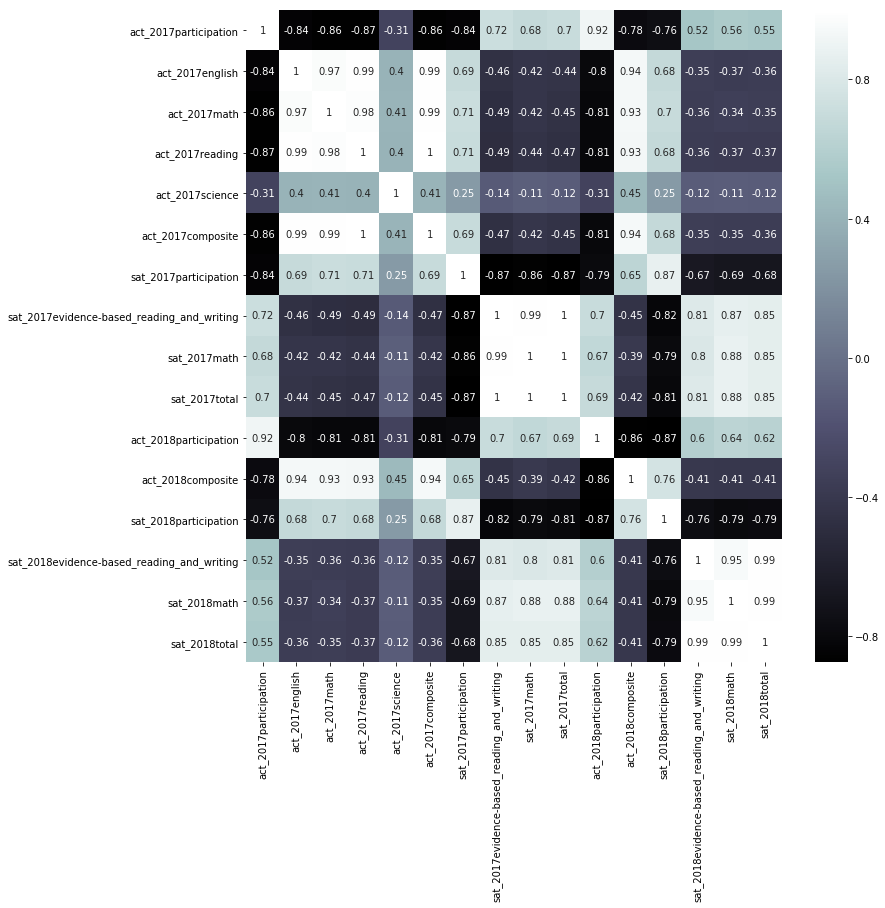

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(final.corr(), annot=True, cmap="bone");


In [45]:
#defining a custom function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,y_label,x_label):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,12))  
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_ylabel(y_label, fontsize=10)
        ax[i].set_xlabel(x_label, fontsize=10)
        ax[i].set_title(column)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    # Set titles, labels, etc here for each subplot

In [184]:
title_list = final_col_list

In [46]:
final_col_list = list(final.columns)

final_col_list
participation_list = ['act_2017participation', 'sat_2017participation', 'act_2018participation', 
                      'sat_2018participation']
math_list = ['act_2017math', 'sat_2017math','sat_2018math']

#sample title list
reading_verbal_list= ['act_2017reading', 'sat_2017evidence-based_reading_and_writing', 'sat_2018evidence-based_reading_and_writing']

#sample list of xlabels
x_labels = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

### Participation rates for SAT & ACT

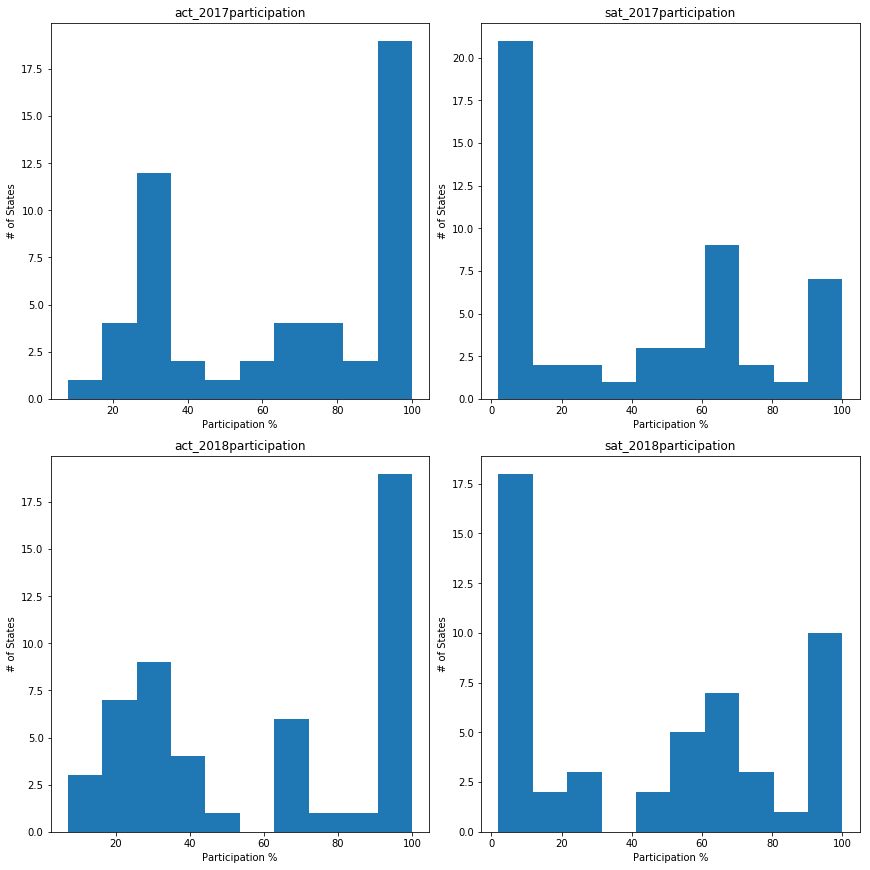

In [186]:
subplot_histograms(final,participation_list, title_list, x_labels, '# of States', 'Participation %')


These charts clearly show the bimodal distribution of the two distinct sections of the population, those who are forced to take the test vs those who are self selective in taking the test.

### Math scores for SAT & ACT

In [187]:
#examine the 
final.describe()

,act_2017participation,act_2017english,act_2017math,act_2017reading,act_2017science,act_2017composite,sat_2017participation,sat_2017evidence-based_reading_and_writing,sat_2017math,sat_2017total,act_2018participation,act_2018composite,sat_2018participation,sat_2018evidence-based_reading_and_writing,sat_2018math,sat_2018total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.043137,21.519608,39.803922,569.117647,556.882353,1126.098039,61.627451,21.498039,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.184164,2.020695,35.276632,45.666901,47.121395,92.494812,34.078122,2.117686,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000


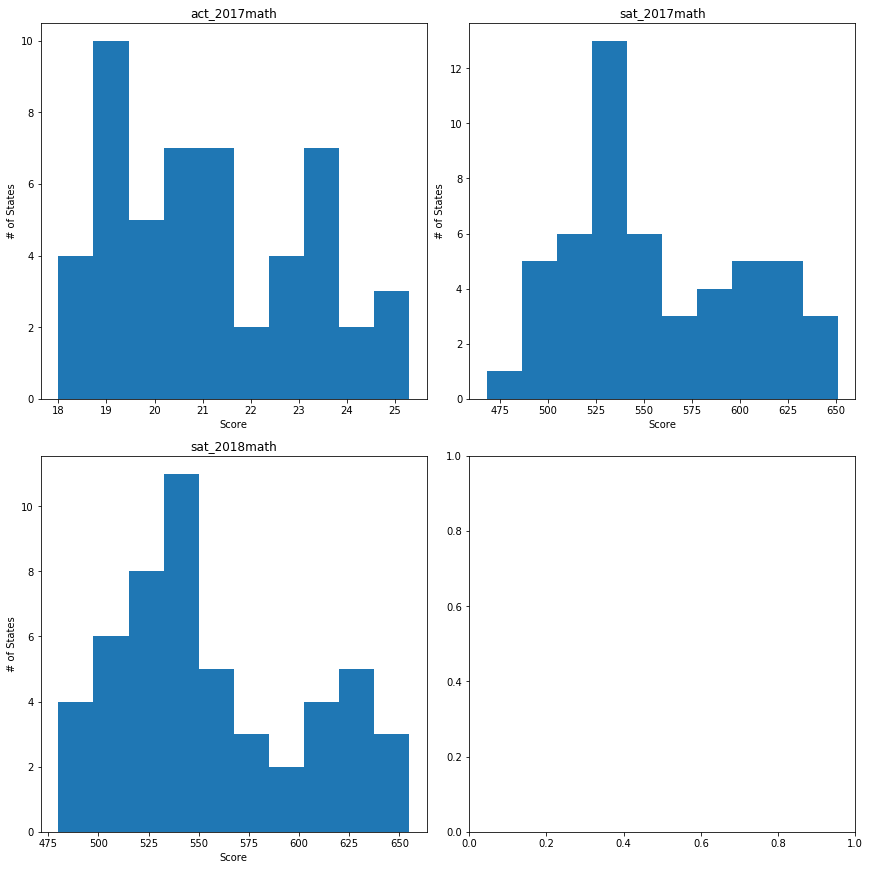

In [188]:
# Math scores for SAT & ACT
subplot_histograms(final, math_list, title_list, x_labels, '# of States', 'Score')

Very similar to the ACT participation/score relationship of the prior charts. These charts clearly show the bimodal distribution of the two distinct sections of the population, those who are forced to take the test vs those who are self selective in taking the test.

### Reading/verbal scores for SAT & ACT

In [ ]:
subplot_histograms(final, reading_verbal_list, title_list, x_labels, '# of States', 'Score')

In [190]:
# defining a function to show a scatterplot based on inputted axes
def scatter_plot(x_axis, y_axis, title, ylabel, xlabel):
    plt.scatter(x_axis,   # X axis
            y_axis) # Y axis
    plt.title(title, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xlabel(xlabel, fontsize = 15);

### SAT vs. ACT math scores for 2017

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


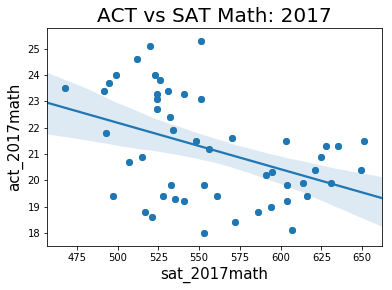

In [191]:
scatter_plot(final['sat_2017math'],final['act_2017math'], 'ACT vs SAT Math: 2017', 'ACT Math', 'SAT Math')
sns.regplot('sat_2017math', 'act_2017math', data= final)

This scatterplot clearly shows a negative correlation between ACT and SAT Math scores for the 2017 testing year. The line of best fit has a slope of -0.42, which means that for every point increase in one test, there would be a corresponding 0.42 point decrease (on average) for the other test.

### SAT vs. ACT verbal/reading scores for 2017

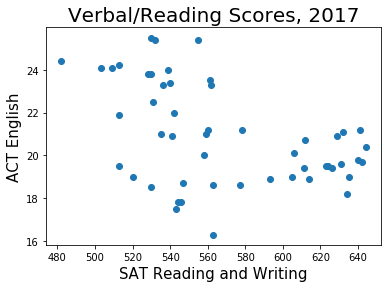

In [192]:
scatter_plot(final['sat_2017evidence-based_reading_and_writing'],final['act_2017english'], 'Verbal/Reading Scores, 2017', 'ACT English', 'SAT Reading and Writing')


INTERPRETATION: Although I was unable to plot the line of best fit for this scatterplot, referencing the heatmap from prior shows us a correlation of -0.46. 

### SAT vs. ACT total/composite scores for 2017

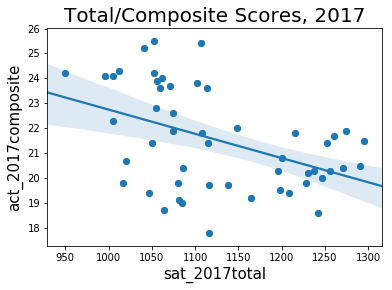

In [214]:
scatter_plot(final['sat_2017total'],final['act_2017composite'], 'Total/Composite Scores, 2017', 'ACT Composite', 'SAT Total')
sns.regplot('sat_2017total', 'act_2017composite', data=final);

INTERPRETATION:
This graph shows a midlevel negative correlation between ACT 2017 Composite scores and SAT 2017 Total scores. By looking at the heatmap prior, it shows a -0.45 corr. This means that for every 1 point increase in the score of one of these tests, there is a correlating 0.45 score decrease for the other test.

### Total scores for SAT 2017 vs. 2018

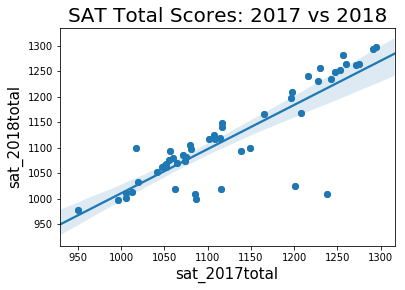

In [215]:
scatter_plot(final['sat_2017total'],final['sat_2018total'], 'SAT Total Scores: 2017 vs 2018', 'Total 2018', 'Total 2017')
sns.regplot('sat_2017total', 'sat_2018total', data=final);

INTERPRETATION: There is a very strong, positive correlation of 0.88 between the data sets for SAT Total Scores for 2017 and 2018. This makes sense, as theoretically there wouldn't be a large change in year over year trends, without structural changes to the test or within the population taking the test itself. 

### Composite scores for ACT 2017 vs. 2018

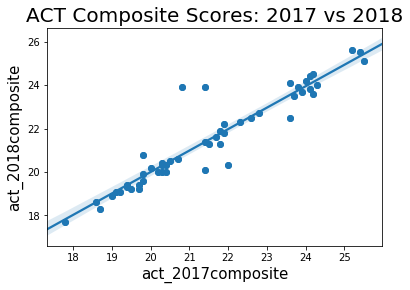

In [216]:
scatter_plot(final['act_2017composite'], final['act_2018composite'], 'ACT Composite Scores: 2017 vs 2018', '2018 Total', '2017 Total')
sns.regplot('act_2017composite', 'act_2018composite', data=final);

INTERPRETATION: There is a very strong, positive correlation of 0.94 between the data sets for ACT Total Scores for 2017 and 2018. This makes sense, as theoretically there wouldn't be a large change in year over year trends, without structural changes to the test or within the population taking the test itself. 

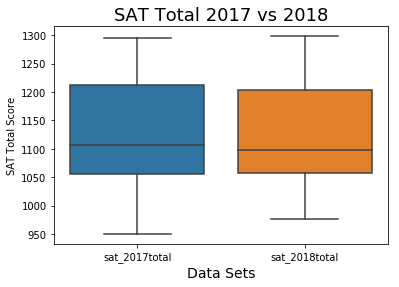

In [202]:
# SAT 2017 Total vs SAT 2018 Total
sns.boxplot(data=final[['sat_2017total','sat_2018total']]).set_title('SAT Total 2017 vs 2018',  size= 18);
plt.ylabel("SAT Total Score");
plt.xlabel("Data Sets", size= 14);

INTERPRETATION: There was very little that changed from the SAT Totals of 2017 to 2018. The lower range rose, from ~950 to ~975, but the upper IQR decreased slightly.

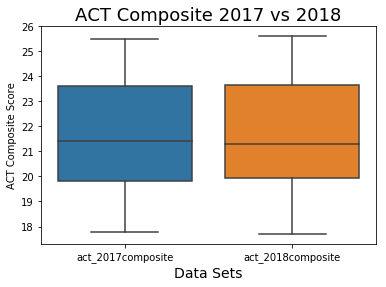

In [203]:
# ACT 2017 Composite vs ACT 2018 Composite
sns.boxplot(data=final[['act_2017composite','act_2018composite']]).set_title('ACT Composite 2017 vs 2018', size= 18);
plt.ylabel("ACT Composite Score");
plt.xlabel("Data Sets", size=14);

INTERPRETATIONS: The boxplot for ACT Composite scores from 2017 to 2018 also is nearly identical, but with a very slight overall increase in scores. 

## Descriptive and Inferential Statistics

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

In our observations, no not really, as it more closely resembles a bimodal distribution. This is where there are two distinct sections of the population.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 
**Response:** No, as inferential statistics deals with an observed sample set from a larger population, and then applying statistical analysis to the sample set to derive insights about the total population. As we are working with a full population's dataset of test data for both SAT and ACT for the years of 2017 and 2018, it doesn't make sense to utilize inferential statistics.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

No, as there is no common scale currently on which to judge them. We would need to assign percentiles in order to compare them on similar scale.

## Outside Research

### Illinois: 
Illinois has a large change as well, also due to a new state contract signed with the SAT. This resulted in a change of +90% for the SAT participation rates from 2017 to 2018 (from 9% to 99%), and a corresponding change in ACT participation rates of -50% (from 93% to 43%). As expected, the SAT test score mean Total fell, from 1115 to 1019, while the ACT test Composite mean score rose from 21.4% to 23.9%.   https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/

### Colorado: 
Colorado has a large swing from 2017 to 2018, most likely entirely due to a new contract acquired by the SAT in partnership with the state of Colorado. This resulted in a change of +89% for the SAT participation rates from 2017 to 2018(from 11% to 100%), and a corresponding change in ACT participation rates of -70% (from 100% to 30%). As expected, the SAT test score mean Total fell, from 1201 to 1025.
"SAT usage also spiked in Colorado because of a contract with the College Board. There, 58,790 in the Class of 2018 took the test, 10 times the total of the previous year." https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/


### Rhode Island
Rhode Island had a large change recently, from 71% to 97% participation on the SAT- while ACT participation fell from 21% to 15%. This was due to changes in the requirements for state testing, which became a part of the state's federal education plan. As expected, the SAT test score mean Total fell, from 1062 to 1018, while the ACT test Composite mean score rose from 24% to 24.2%.


https://www.providencejournal.com/news/20181025/with-sat-required-ri-sees-jump-in-participation-decline-in-scores


## Conclusions and Recommendations

Based on your exploration of the data, what are your key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

The data clearly shows that there is intense competition between the SAT and ACT tests, but it is best to focus on states that do not have any set agreements. There are a handful of states that have no such contracts, yet have high participation in both tests: Florida, Georgia and Hawaii are three that could generate large returns for the effort.

If possible, the ideal situation for the SAT would be: to be a part of the success metric for students, schools, cities, AND states, making it impossible for every level to ignore the impact of the test's importance. In states where there is a clear tie to success, such as Illinois, there are also metrics that incorporate the test scores at the city and school level as well. These are tied to future things such as state and federal funding, so it would make sense for the schools and cities to do as much as they can to speed up adoption of the test.

The states that I would recommend looking into for potential contracts would be: Alaska, Arizona, Iowa, Kansas, New Mexico, Oregon, South Dakota, West Virginia. These are states that have low SAT participation rates as of 2018 and there are no contracts in place. 

The recommendation would be to get as close to the prior mentioned ideal situation as possible. This means locking up a multi-year contract with the state, becoming an integral part of the success metrics for schools, cities and the state itself, and finally mandating pre-SAT (PSAT) starting as early as 9th grade. These steps would ensure revenue generation for at least the duration of the contract.